In [1]:
# Import modules for our task

import scipy
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scs
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [2]:
# Import system libraries and our Scripts

import os
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath(os.path.join('../script')))
from DistributionPlots import DistributionPlots
DP = DistributionPlots() 

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
# Read AdSmart_AB_testing_data 

data  = pd.read_csv('../data/AdSmart_AB_testing_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [5]:
data.head(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
9,004c4cc9-f2ca-4df7-adc9-3d0c3c4f0342,control,2020-07-05,14,Generic Smartphone,6,Chrome Mobile,0,0


In [6]:
data.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [7]:
data.describe()

,hour,platform_os,yes,no
count,8077.00,8077.00,8077.00,8077.00
mean,11.62,5.95,0.07,0.08
std,5.73,0.22,0.26,0.28
min,0.00,5.00,0.00,0.00
25%,7.00,6.00,0.00,0.00
50%,13.00,6.00,0.00,0.00
75%,15.00,6.00,0.00,0.00
max,23.00,7.00,1.00,1.00


In [8]:
data.groupby(['experiment']).count()

,auction_id,date,hour,device_make,platform_os,browser,yes,no
experiment,,,,,,,,
control,4071,4071,4071,4071,4071,4071,4071,4071
exposed,4006,4006,4006,4006,4006,4006,4006,4006


In [9]:
indexNames = data[(data['yes'] == 0) & (data['no'] == 0)].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

In [10]:
data.tail(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1
8071,ffdfdc09-48c7-4bfb-80f8-ec1eb633602b,exposed,2020-07-03,4,Generic Smartphone,6,Chrome Mobile,0,1


In [11]:
data.shape

(1243, 9)

<AxesSubplot:ylabel='yes,no'>

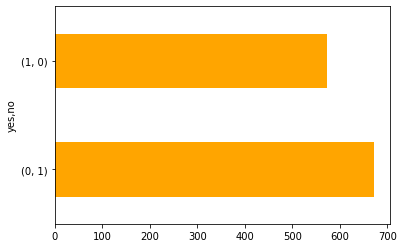

In [12]:
data[['yes','no']].value_counts().plot(kind='barh',color='orange')

In [13]:
# Select columns for our analysis

check_exp_df = data[['auction_id', 'experiment', 'yes', 'no']]
check_exp_df.shape

(1243, 4)

In [14]:
check_exp_df['aware'] = 0
check_exp_df.loc[check_exp_df['yes'] == 1, 'aware'] = 1
check_exp_df.loc[check_exp_df['yes'] == 0, 'aware'] = 0
check_exp_df.drop(columns=['yes', 'no'], inplace=True)
check_exp_df = check_exp_df.set_index('auction_id')

In [15]:
check_exp_df.head(5)

,experiment,aware
auction_id,,
0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,0
008aafdf-deef-4482-8fec-d98e3da054da,exposed,1
00a1384a-5118-4d1b-925b-6cdada50318d,exposed,0
00b6fadb-10bd-49e3-a778-290da82f7a8d,control,1
00ebf4a8-060f-4b99-93ac-c62724399483,control,0


In [16]:
summary_df = check_exp_df.pivot_table( index='experiment', aggfunc='sum')
summary_df['total'] = check_exp_df.pivot_table( index='experiment', aggfunc='count')
summary_df['rate'] = check_exp_df.pivot_table( index='experiment') 
summary_df = summary_df.reindex(['aware', 'total', 'rate'], axis=1)
summary_df 

,aware,total,rate
experiment,,,
control,264,586,0.45
exposed,308,657,0.47


The *aware* column indicates that how many users responded yes to the Brand Impact Optimiser (BIO) questionnaire for the given experimnet group from the total involved users in *total* column. 

In [17]:
# P values of the two groups

exp_rate = summary_df['rate']['exposed']
cont_rate = summary_df['rate']['control']
exp_rate - cont_rate

0.018285619295484168

The conversion rate difference between the two groups is 1.82%. Eventhough this is a good sign but this is not enough evidence for us to confidently make a decision. At this point we have not measured how confident we are in this result. This can be mitigated by looking at the distributions of the two groups.


### Compare the Two Groups

In [18]:
# Initializing variables based on data
# Where C stands for Control, E stands for Exposed and cr stands for Conversation rate

C_aware = 264; C_total = 586; C_cr = 0.45
E_aware = 308; E_total = 657; E_cr = 0.47

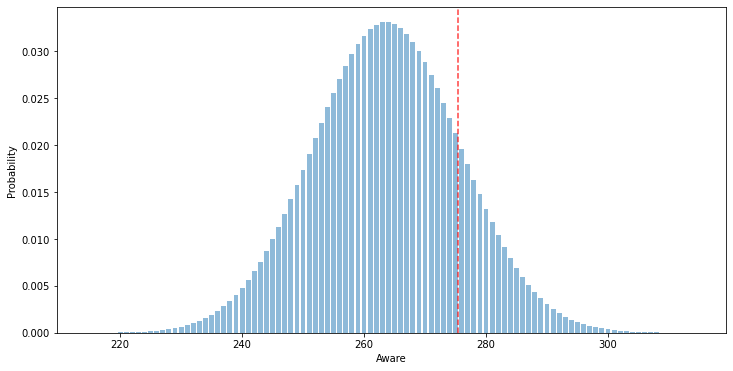

In [19]:
# Control group distribution with probability of getting the result from our exposed group

DP.cont_distribution(C_aware, C_total, C_cr, E_cr)

The distribution for the control group is shown in blue and the result from the test group is indicated by the red dashed line. We can see that the probability of getting the result from the test group was very low. However, the probability does not convey the confidence level of the results. It does not take the sample size of our test group into consideration.  

#### Binomial Distribution

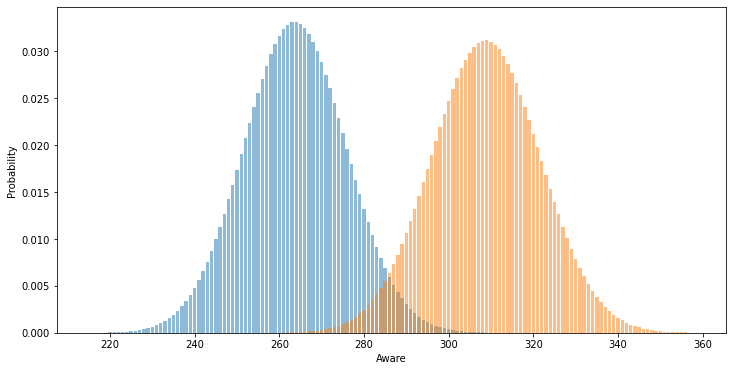

In [20]:
# Comparison of control and exposed groups distribution against each other
# by plotting the test group results as a binomial distribution

DP.cont_exp_distribution(C_aware, E_aware, C_total, E_total, C_cr, E_cr)

From this plot we can undestand that the test group converted more users than the control group. We can also see that the peak of the test group results is lower than the control group.

Let us Standardize the data and compare the probability of successes, ***p***, for both groups - using Bernoulli Distribution and the Central Limit Theorem.

Find the standard error of the two groups

In [21]:
SE_C = np.sqrt(cont_rate * (1-cont_rate)) / np.sqrt(C_total)
SE_E = np.sqrt(exp_rate * (1-exp_rate)) / np.sqrt(E_total)